<h1 style="color: #AA1358;">SUPERVISED REGRESSION</h1>

<h2 style="color: #6D183F;">Libraries</h2>

In [1]:
### 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # funciones matemáticas

#❗New Libraries !
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

!pip install xgboost
import xgboost as xgb

<h2 style="color: #6D183F;">Data Extraction</h2>

In [3]:
data = pd.read_csv("df_default.csv")

In [4]:
df = data.copy()

In [5]:
df.shape

(20467, 21)

In [6]:
df.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,735519,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,735576,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,735654,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,735576,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,735647,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


- We do a counter for discrete numbers, to **define numerical continuos** and **categorical values**

In [7]:
num = []
cat = []

for column in df.columns:
    if int(df[column].nunique()) > 6:
        num.append(column)
    else:
        cat.append(column)
print(f' numerical : {num}')
print(f' categorical : {cat}')

 numerical : ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']
 categorical : ['floors', 'waterfront', 'view', 'condition']


In [8]:
df.drop(columns=cat, inplace=True)

#### We proceed to perform the Lienal Regression of the num df, with the total of continuous numeric columns. The only change we made previously (besides the standardization data cleaning and categorize only the cont nums) was to clean the variable we are going to use as target for the model from outliers.

<h2 style="color: #6D183F;">Data Preprocessing</h2>

In [9]:
X = df.drop("price", axis=1)
y = df["price"]

<h2 style="color: #6D183F;">Modeling</h2>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 20467.
80% for training data: 16373.
20% for test data: 4094.


<h3 style="color: #A4064D;">Selecting the model: Linear Regression</h3> 

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- Model validation

In [13]:
predictions = model.predict(X_test)

In [14]:
print(f'20% for test prediction data: {len(predictions)}.')

20% for test prediction data: 4094.


- Metrics

In [15]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

In [16]:
print("Linear Regresion Metrics")
print("")
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

Linear Regresion Metrics

R2 =  0.668
RMSE =  117589.4886
The value of the metric MSE is  13827287837.2443
MAE =  89133.5714


#### We have not obtained very good metrics, with an R2 of 68% success rate. That is why we are going to try other types of supervised regression models, seeking to achieve a higher degree of accuracy and lower error values.

<h2 style="color: #6D183F;">Improving the Model</h2>


<h3 style="color: #A4064D;">Selecting the model: Ridge Regression</h3> 

In [17]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

- Model validation

In [18]:
predictions_ridge = ridge.predict(X_test)

In [19]:
print(f'20% for test prediction data: {len(predictions_ridge)}.')

20% for test prediction data: 4094.


- Metrics

In [20]:
r2_rid = r2_score(y_test, predictions_ridge)
RMSE_rid = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_rid = mean_squared_error(y_test, predictions_ridge)
MAE_rid = mean_absolute_error(y_test, predictions_ridge)

In [21]:
print("Ridge Regresion Metrics")
print("")
print("R2 = ", round(r2_rid, 4))
print("RMSE = ", round(RMSE_rid, 4))
print("The value of the metric MSE is ", round(MSE_rid, 4))
print("MAE = ", round(MAE_rid, 4))

Ridge Regresion Metrics

R2 =  0.668
RMSE =  117581.7942
The value of the metric MSE is  13825478317.8144
MAE =  89130.5564


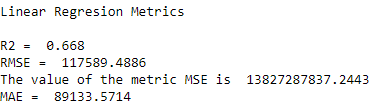

#### The results obtained are almost identical between Ridge and Linear Regression. 

<h3 style="color: #A4064D;">Selecting the model: Lasso Regression</h3> 

In [22]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

- Model validation

In [23]:
predictions_lasso = lasso.predict(X_test)

In [24]:
print(f'20% for test prediction data: {len(predictions_lasso)}.')

20% for test prediction data: 4094.


- Metrics

In [25]:
r2_las = r2_score(y_test, predictions_lasso)
RMSE_las = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_las = mean_squared_error(y_test, predictions_lasso)
MAE_las = mean_absolute_error(y_test, predictions_lasso)

In [26]:
print("Lasso Regresion Metrics")
print("")
print("R2 = ", round(r2_las, 4))
print("RMSE = ", round(RMSE_las, 4))
print("The value of the metric MSE is ", round(MSE_las, 4))
print("MAE = ", round(MAE_las, 4))

Lasso Regresion Metrics

R2 =  0.668
RMSE =  117589.1003
The value of the metric MSE is  13827196510.0235
MAE =  89132.9963


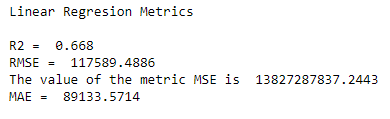

#### Identical results to Regression and Ridge

<h3 style="color: #A4064D;">Selecting the model: Decision Tree Regresion</h3> 

In [27]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

- Model validation

In [28]:
predictions_tree = tree.predict(X_test)

In [29]:
print(f'20% for test prediction data: {len(predictions_tree)}.')

20% for test prediction data: 4094.


- Metrics

In [30]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

In [31]:
print("Decision Tree Regresion Metrics")
print("")
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

Decision Tree Regresion Metrics

R2 =  0.7087
RMSE =  110144.4048
The value of the metric MSE is  12131789911.0872
MAE =  76785.435


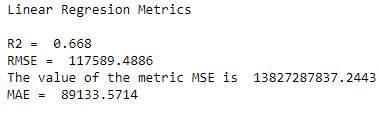

#### Decision Tree gets a better R2 score, but our errors still being to high

<h3 style="color: #A4064D;">Selecting the model: XGBoost Regresion</h3> 

In [32]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

- Model validation

In [33]:
predictions_xgb = xgbr.predict(X_test)

In [34]:
print(f'20% for test prediction data: {len(predictions_xgb)}.')

20% for test prediction data: 4094.


- Metrics

In [35]:
r2_xgb = r2_score(y_test, predictions_xgb)
RMSE_xgb = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_xgb = mean_squared_error(y_test, predictions_xgb)
MAE_xgb = mean_absolute_error(y_test, predictions_xgb)

In [36]:
print("XGBoost Regresion Metrics")
print("")
print("R2 = ", round(r2_xgb, 4))
print("RMSE = ", round(RMSE_xgb, 4))
print("The value of the metric MSE is ", round(MSE_xgb, 4))
print("MAE = ", round(MAE_xgb, 4))

XGBoost Regresion Metrics

R2 =  0.7749
RMSE =  96811.9368
The value of the metric MSE is  9372551107.945
MAE =  69348.1139


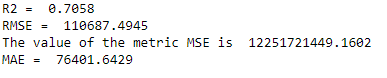

#### XGBoost obtains a considerable improvement (77%) compared to the 70% obtained by Decisions tree. However, the error values are still insanely high.

<h2 style="color: #6D183F;">Comparision between Models</h2>


In [37]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'XGBoost'],
    'R²': [r2, r2_rid, r2_las, r2_tree, r2_xgb],
    'RMSE': [RMSE, RMSE_rid, RMSE_las, RMSE_tree, RMSE_xgb],
    'MSE': [MSE, MSE_rid, MSE_las, MSE_tree, MSE_xgb],
    'MAE': [MAE, MAE_rid, MAE_las, MAE_tree, MAE_xgb]
}

In [38]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,XGBoost
R²,6.679649e-01,6.680083e-01,6.679671e-01,7.086789e-01,7.749366e-01
RMSE,1.175895e+05,1.175818e+05,1.175891e+05,1.101444e+05,9.681194e+04
MSE,1.382729e+10,1.382548e+10,1.382720e+10,1.213179e+10,9.372551e+09
MAE,8.913357e+04,8.913056e+04,8.913300e+04,7.678544e+04,6.934811e+04


<h2 style="color: #6D183F;">Testing Target vs Prediction</h2>


In [39]:
series_pred = pd.Series(predictions_xgb, name='predictions')

In [40]:
series_y_test = pd.Series(y_test, name='actual')

In [41]:
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)

In [42]:
comparison_df.head(10)

,actual,predictions
0,420000.0,555642.000000
1,230000.0,366487.250000
2,270000.0,274284.968750
3,807000.0,619186.125000
4,225000.0,253086.765625
5,410000.0,435757.093750
6,135000.0,256535.046875
7,550000.0,620201.687500
8,289000.0,300039.250000
9,575000.0,562926.125000


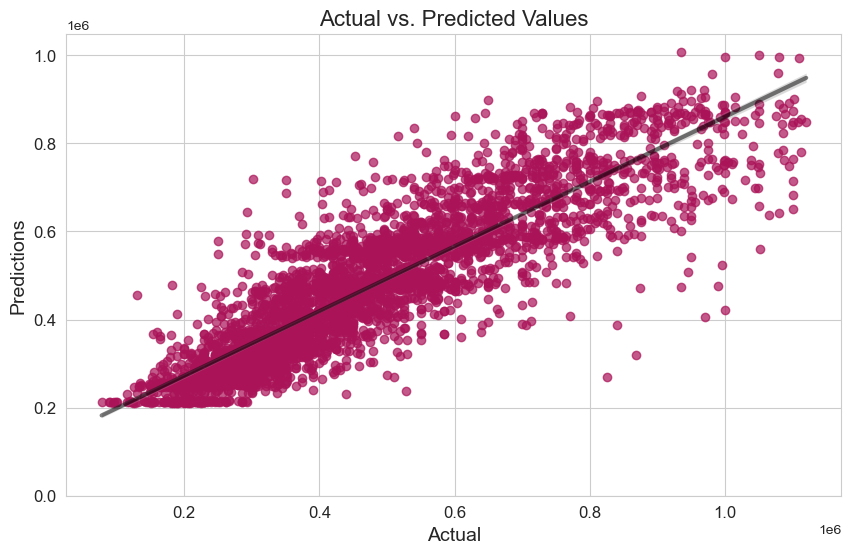

In [43]:
scatter_color = "#AA1358"
line_color = "black"

plt.figure(figsize=(10, 6))

sns.set_style("whitegrid")

sns.regplot(x='actual', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "alpha": 0.5, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### As we suspected, the regression predictions are distributed in an underfitting manner. We will keep the XGBoost model for future tests, but we will try to improve it by normalizing its variables or decreasing multicollinearity.

<h2 style="color: #6D183F;">Export df to NB Improve Modeling</h2>

In [44]:
df.to_csv("df_improved.csv", index=False)